In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm      
from sklearn import datasets
import numpy as np

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [3]:

def plot_cost(list_cost):
    """2D plot of the cost on each iteration."""
    fig, ax = plt.subplots(figsize = (4, 3), dpi = 300)
    ax.plot(list_cost[0],color = "blue", label = "GD")
    ax.plot(list_cost[1],color = "red", label = "momentum")
    ax.plot(list_cost[2],color = "green", label = "adagrad")
    ax.plot(list_cost[3],color = "yellow", label = "rmsprop")
    ax.plot(list_cost[4],color = "black", label = "adam")
    ax.legend()
    plt.xlabel("iteration")
    plt.ylabel("$J(\mathbf{w})$")
                                                 #order["standard","momentum","adagrad","rmsprop","adam"]

In [4]:
def plot_cost_one(model,methode):
    fig, ax = plt.subplots(figsize = (4, 3), dpi = 300)
    ax.plot(model.cost_hist,color = "blue", label = methode)
    ax.legend()
    plt.xlabel("iteration")
    plt.ylabel("$J(\mathbf{w})$")

In [ ]:
class Adadelta(Adam):
    '''Adaptive learning rate method without the need to explicitly set a learning rate : https://arxiv.org/pdf/1212.5701.pdf'''
    def __init__(self, gamma=0.9, **kwargs):
        super().__init__(**kwargs)
        self.gamma = gamma 


    def optimize(self,grads, epoch_num, steps):

        # squared grad var
        self.v['W'] = self.gamma * self.v['W'] + (1 - self.gamma) * grads** 2
        w_update = - np.sqrt(self.m['W'] + self.epsilon) / np.sqrt(self.v['W'] + self.epsilon) * grads 
        

        # grad updates var 
        self.m[f'W{idx}'] = self.gamma * self.m[f'W{idx}']  + (1 - self.gamma) * w_update ** 2
      
        W += w_update
        

Gradient descent solution in 2000 iterations: [ 0.29520044 -0.24069717].
Least squares solutions: [ 0.62019238 -0.854405  ].


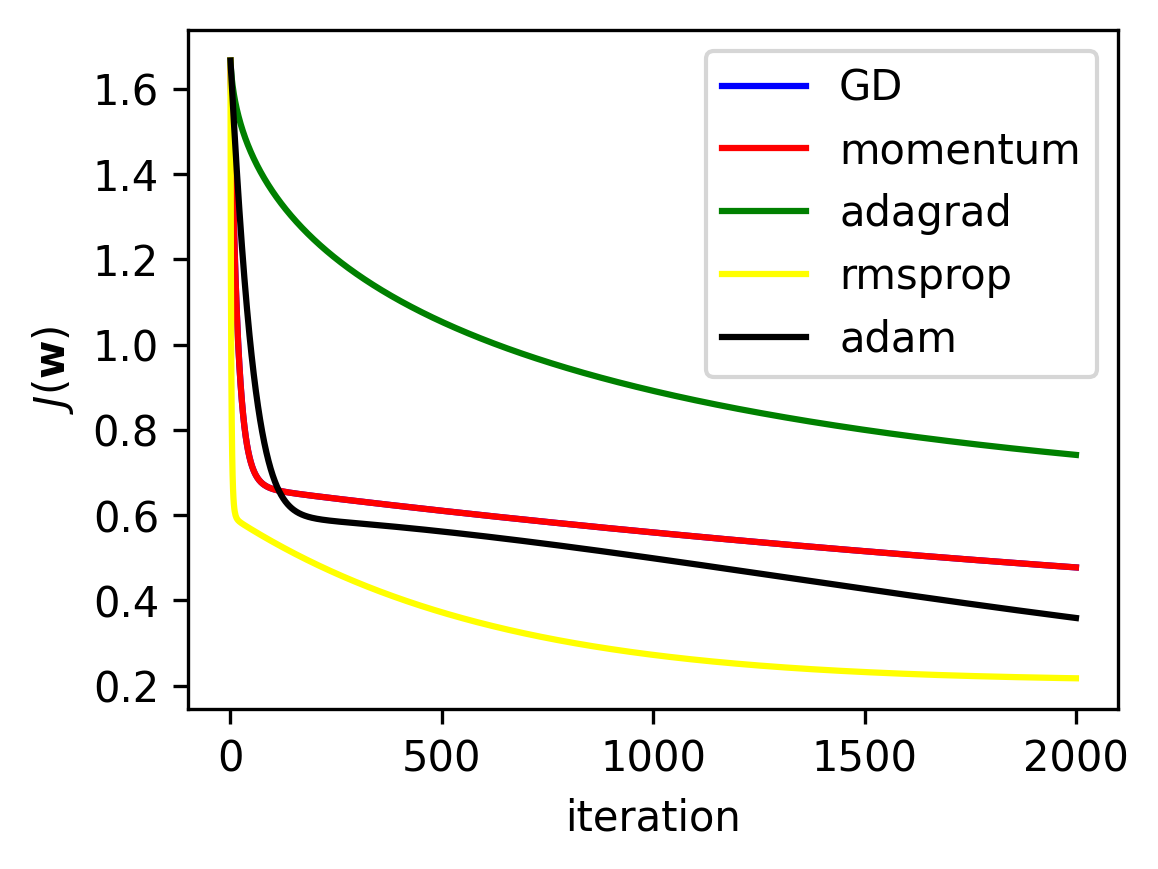

In [6]:
import numpy as np
import matplotlib.pyplot as plt

LR = 0.001
MAX_ITER = 2000
gamma = 0.999
beta1 = 0.9
beta2 = 0.999
METHOD = "momentum"

class GradientDescentLinearRegression:
    """
    Linear Regression with gradient-based optimization.
    Parameters
    ----------
    learning_rate : float
        Learning rate for the gradient descent algorithm.
    max_iterations : int
        Maximum number of iteration for the gradient descent algorithm.
    eps : float
        Tolerance level for the Euclidean norm between model parameters in two 
        consequitive iterations. The algorithm is stopped when the norm becomes 
        less than the tolerance level.
    """
    
    def __init__(self, learning_rate=0.02, max_iterations=100000, eps=1e-6):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.eps = eps
        
    def predict(self, X):
        """Returns predictions array of shape [n_samples,1]"""
        return np.dot(X, self.w.T)
    
    def cost(self, X, y):
        """Returns the value of the cost function as a scalar real number"""
        y_pred = self.predict(X)
        loss = (y - y_pred)**2
        return np.mean(loss)

    def grad(self, X, y):
        """Returns the gradient vector"""
        y_pred = self.predict(X)
        d_intercept = -2*sum(y - y_pred)                   
        d_w = -2*sum(X[:,1:] * (y - y_pred).reshape(-1,1)) 
        g = np.append(np.array(d_intercept), d_w)           # Gradient.
        return g / X.shape[0]                               # Average over training samples.

    def adagrad(self, g):
        self.G += g**2                                     # Update cache.
        step = self.learning_rate / (np.sqrt(self.G + self.eps)) * g
        return step

    def adagrad1(self,grad_store):
        G = np.sum(np.square(grad_store), axis=0)
        step = self.learning_rate / np.sqrt(G + self.eps) 
        return step

    def momentum(self,grad,velocity):
        velocity = gamma* velocity + self.learning_rate * grad
        return velocity       

    def rmsprop(self,grad,expected_grad):
        RMS_grad = np.sqrt(expected_grad + self.eps)
        step = (self.learning_rate/RMS_grad)*grad  
        return step
        
    def adam(self,grad,mhat,vhat):
        step = 1 * self.learning_rate * mhat/(np.sqrt(vhat) + self.eps)
        return step 
        
    def fit(self, X, y, method = "standard", verbose = True):
        """
        Fit linear model with gradient descent.
        
        Parameters
        ----------
        X : numpy array or sparse matrix of shape [n_samples,n_predictors]
            Training data
        y : numpy array of shape [n_samples,1]
            Target values.
        method : string
                 Defines the variant of gradient descent to use. 
                 Possible values: "standard", "adagrad".
        verbose: boolean
                 If True, print the gradient, parameters and the cost function 
                 for each iteration.
        
        Returns
        -------
        self : returns an instance of self.
        """
        
        self.w = np.zeros(X.shape[1])  
        grad_store = np.zeros([self.max_iterations, 2], dtype=float) 
        expected_grad = np.array([0,0])
        mt = np.array([0, 0])
        vt = np.array([0, 0])
        velocity = np.array([0, 0])
                                          # Initialization of params.
        if method == "adagrad":
            self.G = np.zeros(X.shape[1])                 # Initialization of cache for AdaGrad.
        w_hist = [self.w]                                 # History of params.
        cost_hist = [self.cost(X, y)]                     # History of cost.      
        i=0

        for iter in range(self.max_iterations):
            
            g = self.grad(X, y) # Calculate the gradient.
            grad_store[i] = g  
                                    
            if method == "standard":
                step = self.learning_rate * g 
            elif method == "momentum":
               step = self.momentum(g,velocity)               
            elif method == "adagrad":
                step = self.adagrad(g) 
            # elif method == "adagrad1":
            #      step = self.adagrad1(grad_store)*g
            elif method == "rmsprop":
                 expected_grad = gamma * expected_grad + (1 - gamma) * np.square(g)
                 step = self.rmsprop(g,expected_grad)
            elif method == "adam":
              # approximate first and second moment
                mt = beta1 * mt + (1 - beta1) * g
                vt = beta2 * vt + (1 - beta2) * np.square(g) 
                # bias corrected moment estimates
                mhat = mt / (1 - beta1 ** (i+1))
                vhat = vt / (1 - beta2 ** (i+1))
                step = self.adam(g,mhat,vhat)                               
            else:
                raise ValueError("Method not supported.")
            self.w = self.w - step                        # Update parameters.
            w_hist.append(self.w)                         # Save to history.
            
            J = self.cost(X, y)                           # Calculate the cost.
            cost_hist.append(J)                           # Save to history.
            i+=1
            if verbose:
                print(f"Iter: {iter}, gradient: {g}, params: {self.w}, cost: {J}")
            
            # Stop if update is small enough.
            if np.linalg.norm(w_hist[-1] - w_hist[-2]) < self.eps:
                break
        
        # Final updates before finishing.
        self.iterations = iter + 1                       # Due to zero-based indexing.
        self.w_hist = w_hist
        self.cost_hist = cost_hist
        self.method = method
        
        return self


if __name__ == "__main__":
    Methode_list = ["standard","momentum","adagrad","rmsprop","adam"]
    path = "./"
    list_cost = []
    for method in Methode_list:
        model = GradientDescentLinearRegression(LR, MAX_ITER).fit(X, y, method,False)
        list_cost.append(model.cost_hist)
    print(f"Gradient descent solution in {model.iterations} iterations: {model.w}.")
    # print(list_cost)
    w_lstsq = np.linalg.lstsq(X, y, rcond = None)[0]
    print(f"Least squares solutions: {w_lstsq}.")

    if (X.shape[1] == 2):
        # Generate plots only for a two-parameter problem.
        plot_cost(list_cost)
        plt.savefig(path + "All_cost_cuve.png")

In [ ]:
model.cost_hist

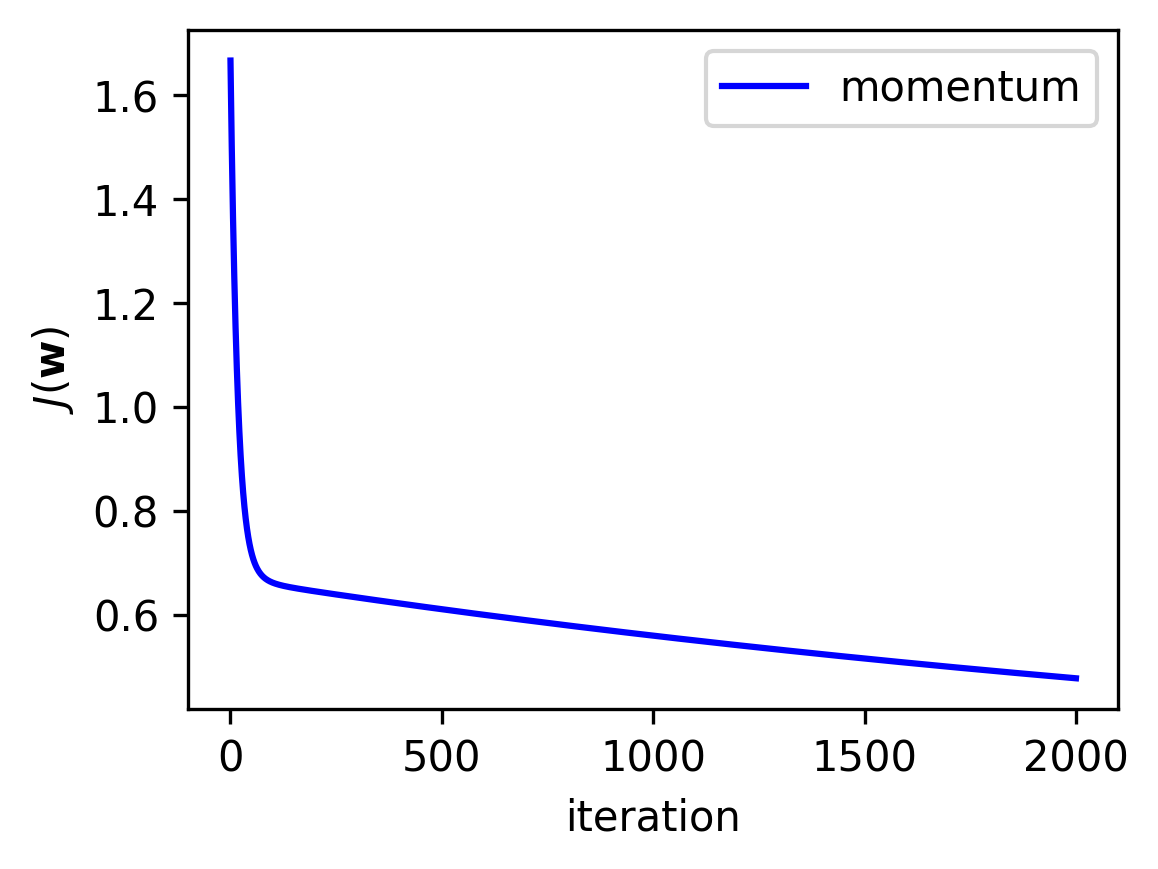

In [8]:
path = "./"
method = "momentum"
    
model = GradientDescentLinearRegression(LR, MAX_ITER).fit(X, y, method,False)
if (X.shape[1] == 2):
    plot_cost_one(model,method)
    plt.savefig(path + method+"_cuve.png")
